In [177]:
import pandas as pd

In [178]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [179]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [180]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [182]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [183]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [184]:
df.isnull().sum().sum()

np.int64(235)

In [185]:
df.duplicated().sum()

np.int64(0)

In [186]:
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [187]:
df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

<Axes: xlabel='Teacher_Quality'>

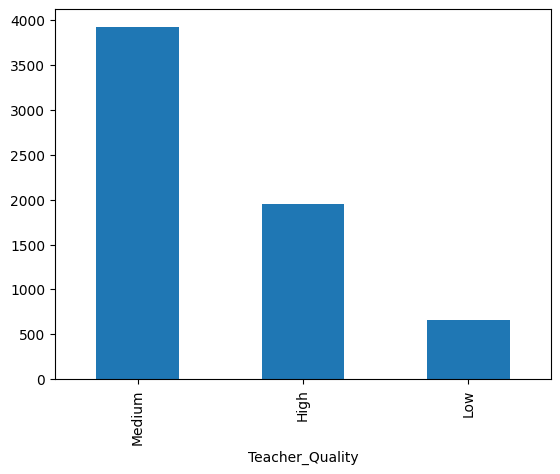

In [188]:
df['Teacher_Quality'].value_counts().plot(kind='bar')

In [189]:
df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

<Axes: xlabel='Parental_Education_Level'>

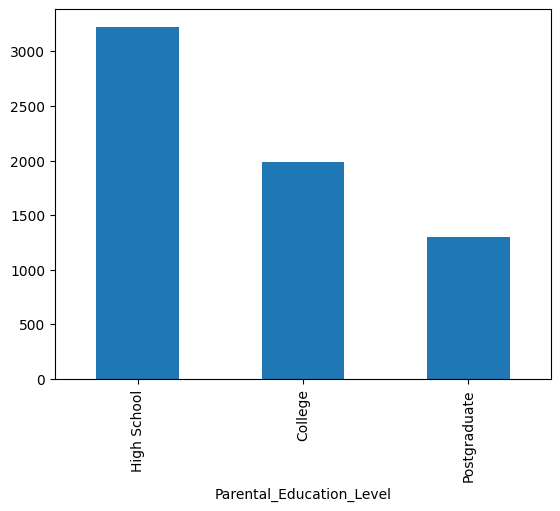

In [190]:
df['Parental_Education_Level'].value_counts().plot(kind='bar')

In [191]:
df['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

<Axes: xlabel='Distance_from_Home'>

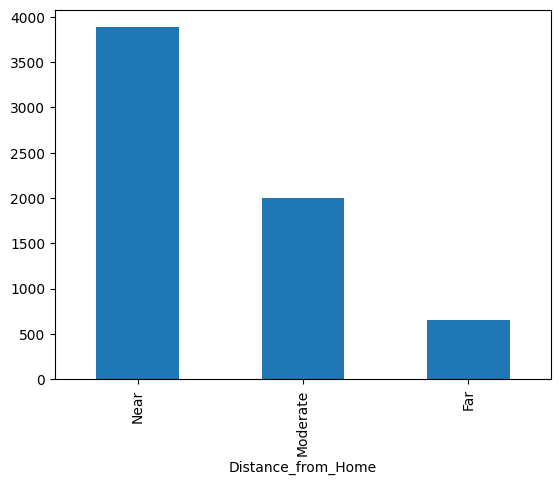

In [192]:
df['Distance_from_Home'].value_counts().plot(kind='bar')

In [193]:
df['Parental_Education_Level'].isna().mean() * 100

np.float64(1.362191614953837)

In [194]:
df["Teacher_Quality"].isna().mean()*100

np.float64(1.1805660662933253)

In [195]:
df["Distance_from_Home"].isna().mean()*100

np.float64(1.0140759800211896)

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
x = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [199]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [200]:
missing_cat_cols = [
    'Teacher_Quality',
    'Parental_Education_Level',
    'Distance_from_Home'
]

# other categorical columns (no missing)
other_cat_cols = X_train.select_dtypes(include='object').columns.difference(missing_cat_cols)

# numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


In [201]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('missing_cat_impute',
         SimpleImputer(strategy='constant', fill_value='Missing'),
         missing_cat_cols),

        ('other_cats_pass', 'passthrough', other_cat_cols),

        ('numerics_pass', 'passthrough', numeric_cols)
    ]
)


In [202]:
preprocessor.fit(X_train)

X_train_arr = preprocessor.transform(X_train)
X_test_arr = preprocessor.transform(X_test)

In [203]:
feature_names = (
    list(missing_cat_cols) +
    list(other_cat_cols) +
    list(numeric_cols)
)


In [204]:
feature_names

['Teacher_Quality',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Family_Income',
 'Gender',
 'Internet_Access',
 'Learning_Disabilities',
 'Motivation_Level',
 'Parental_Involvement',
 'Peer_Influence',
 'School_Type',
 'Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity']

In [205]:
X_train_df = pd.DataFrame(X_train_arr, columns=feature_names)
X_test_df = pd.DataFrame(X_test_arr, columns=feature_names)

In [206]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Teacher_Quality             1983 non-null   object
 1   Parental_Education_Level    1983 non-null   object
 2   Distance_from_Home          1983 non-null   object
 3   Access_to_Resources         1983 non-null   object
 4   Extracurricular_Activities  1983 non-null   object
 5   Family_Income               1983 non-null   object
 6   Gender                      1983 non-null   object
 7   Internet_Access             1983 non-null   object
 8   Learning_Disabilities       1983 non-null   object
 9   Motivation_Level            1983 non-null   object
 10  Parental_Involvement        1983 non-null   object
 11  Peer_Influence              1983 non-null   object
 12  School_Type                 1983 non-null   object
 13  Hours_Studied               1983 non-null   obje

In [207]:
for col in numeric_cols:
    X_train_df[col] = pd.to_numeric(X_train_df[col])
    X_test_df[col] = pd.to_numeric(X_test_df[col])

In [208]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Teacher_Quality             1983 non-null   object
 1   Parental_Education_Level    1983 non-null   object
 2   Distance_from_Home          1983 non-null   object
 3   Access_to_Resources         1983 non-null   object
 4   Extracurricular_Activities  1983 non-null   object
 5   Family_Income               1983 non-null   object
 6   Gender                      1983 non-null   object
 7   Internet_Access             1983 non-null   object
 8   Learning_Disabilities       1983 non-null   object
 9   Motivation_Level            1983 non-null   object
 10  Parental_Involvement        1983 non-null   object
 11  Peer_Influence              1983 non-null   object
 12  School_Type                 1983 non-null   object
 13  Hours_Studied               1983 non-null   int6

In [209]:
X_test_df.head()

,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Access_to_Resources,Extracurricular_Activities,Family_Income,Gender,Internet_Access,Learning_Disabilities,Motivation_Level,Parental_Involvement,Peer_Influence,School_Type,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,Medium,High School,Near,Low,No,Medium,Male,Yes,No,High,Medium,Negative,Public,20,71,7,87,1,5
1,High,High School,Moderate,Low,Yes,Low,Female,Yes,No,Low,Medium,Neutral,Public,22,71,7,98,2,2
2,Medium,Postgraduate,Near,Medium,Yes,Medium,Female,Yes,No,High,High,Positive,Public,21,91,6,53,1,3
3,Low,High School,Moderate,Low,Yes,Low,Male,Yes,No,Low,Medium,Positive,Public,12,91,8,81,0,4
4,Medium,High School,Near,High,Yes,High,Male,Yes,No,Medium,Low,Neutral,Public,21,63,8,95,2,5


In [210]:
X_test_df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium     1193
High        559
Low         205
Missing      26
Name: count, dtype: int64

In [211]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [212]:
ordinal_cols = [
    'Teacher_Quality',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Motivation_Level',
    'Parental_Involvement',
    'Family_Income',
    'Peer_Influence'
]

ordinal_categories = [
    ['Low', 'Medium', 'High','Missing'],                 # Teacher_Quality
    ['High School', 'College', 'Postgraduate','Missing'],   # Parental_Education_Level
    ['Near', 'Moderate', 'Far','Missing'],    # Distance_from_Home
    ['Low', 'Medium', 'High'],                 # Motivation_Level
    ['Low', 'Medium', 'High'],                 # Parental_Involvement
    ['Low', 'Medium', 'High'],                 # Family_Income
    ['Negative', 'Neutral', 'Positive']       # Peer_Influence
]


In [213]:
onehot_cols = [
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Gender',
    'Internet_Access',
    'Learning_Disabilities',
    'School_Type'
]

In [214]:
numeric_cols = [
    'Hours_Studied',
    'Attendance',
    'Sleep_Hours',
    'Previous_Scores',
    'Tutoring_Sessions',
    'Physical_Activity'
]


In [215]:
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)
onehot_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')
numeric_transformer = 'passthrough'

In [216]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('onehot', onehot_transformer, onehot_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

In [217]:
X_train_trans = preprocessor.fit_transform(X_train_df)
X_test_trans = preprocessor.transform(X_test_df)

In [219]:
# Ordinal columns
ordinal_names = ordinal_cols

# OneHot encoded columns
onehot_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)

# Numeric columns (passthrough)
numeric_names = numeric_cols

# Combine all names
feature_names = list(ordinal_names) + list(onehot_names) + list(numeric_names)

In [220]:
X_train_df_final = pd.DataFrame(X_train_trans, columns=feature_names)
X_test_df_final = pd.DataFrame(X_test_trans, columns=feature_names)

In [222]:
X_test_df_final.head()

,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Motivation_Level,Parental_Involvement,Family_Income,Peer_Influence,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Gender_Male,Internet_Access_Yes,Learning_Disabilities_Yes,School_Type_Public,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,20.0,71.0,7.0,87.0,1.0,5.0
1,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,22.0,71.0,7.0,98.0,2.0,2.0
2,1.0,2.0,0.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,21.0,91.0,6.0,53.0,1.0,3.0
3,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,12.0,91.0,8.0,81.0,0.0,4.0
4,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,21.0,63.0,8.0,95.0,2.0,5.0


In [223]:
X_test_df_final.describe()

,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Motivation_Level,Parental_Involvement,Family_Income,Peer_Influence,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Gender_Male,Internet_Access_Yes,Learning_Disabilities_Yes,School_Type_Public,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000
mean,1.204740,0.759960,0.510842,0.909733,1.086233,0.798285,1.173475,0.192133,0.494705,0.582451,0.563288,0.931417,0.092284,0.697428,20.017650,79.976299,7.025214,75.008069,1.469995,2.953101
std,0.629287,0.830104,0.709428,0.696264,0.693146,0.744748,0.745090,0.394077,0.500098,0.493279,0.496104,0.252807,0.289500,0.459487,6.014546,11.507640,1.481936,14.275222,1.213356,1.028513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,60.000000,4.000000,50.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,79.000000,7.000000,75.000000,1.000000,3.000000
75%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,24.000000,90.000000,8.000000,87.000000,2.000000,4.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000,100.000000,10.000000,100.000000,7.000000,6.000000


In [224]:
X_test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Teacher_Quality                 1983 non-null   float64
 1   Parental_Education_Level        1983 non-null   float64
 2   Distance_from_Home              1983 non-null   float64
 3   Motivation_Level                1983 non-null   float64
 4   Parental_Involvement            1983 non-null   float64
 5   Family_Income                   1983 non-null   float64
 6   Peer_Influence                  1983 non-null   float64
 7   Access_to_Resources_Low         1983 non-null   float64
 8   Access_to_Resources_Medium      1983 non-null   float64
 9   Extracurricular_Activities_Yes  1983 non-null   float64
 10  Gender_Male                     1983 non-null   float64
 11  Internet_Access_Yes             1983 non-null   float64
 12  Learning_Disabilities_Yes       19

In [225]:
from sklearn.linear_model import LinearRegression

In [226]:
model = LinearRegression()
model.fit(X_train_df_final, y_train)
y_pred = model.predict(X_test_df_final)

In [227]:
y_pred

array([64.63166555, 65.35857992, 71.46640666, ..., 68.35812416,
       69.98724176, 66.23107812], shape=(1983,))

In [229]:
from sklearn.metrics import mean_squared_error, r2_score

In [230]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


RMSE: 1.77
R2 Score: 0.77


In [231]:
from sklearn.model_selection import cross_val_score

In [232]:
cv_scores = cross_val_score(model, X_train_df_final, y_train, cv=5, scoring='r2')


In [234]:
import numpy as np

In [235]:
print("Cross-validation R2 scores:", cv_scores)
print("Mean R2 score:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))

Cross-validation R2 scores: [0.75034733 0.91618201 0.65616132 0.68995512 0.57932934]
Mean R2 score: 0.7183950214249033
Standard deviation: 0.11327998097177613


In [236]:
import pandas as pd

comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison.head(10))


      Actual  Predicted
743       65  64.631666
5551      65  65.358580
3442      71  71.466407
6571      64  64.429524
4204      66  66.403766
2516      66  66.602471
4047      72  72.422400
1706      66  66.367676
1075      70  69.955381
233       70  70.066408
